<a href="https://colab.research.google.com/github/priyanshusingh-collab/Alzheimer-s-Prediction-Model/blob/main/Augmented_Alzheimer_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow  as tf
from tensorflow import keras
import  matplotlib.pyplot as plt
import os
import zipfile
from  keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop

In [2]:
#Install Kaggle API to fetch data directly to colab
#Note:- To run this code in Google Colab, download the Kaggle API token and upload it to the directory /content/
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download uraninjo/augmented-alzheimer-mri-dataset-v2

100% 377M/379M [00:17<00:00, 24.4MB/s]
100% 379M/379M [00:17<00:00, 22.9MB/s]


In [4]:
#Extract downloaded zip data to the directory /content/data/ 
zipref = zipfile.ZipFile("/content/augmented-alzheimer-mri-dataset-v2.zip",'r')
zipref.extractall()
zipref.close()
train_dir = "/content/data/train"
val_dir = "/content/data/val"

In [17]:
#Normalize data using Imagedatagenerator
train_gen = ImageDataGenerator(rescale = 1./255)
val_gen =  ImageDataGenerator(rescale = 1./255)


In [18]:
#Define ImageDataGenerator
train_image = train_gen.flow_from_directory(train_dir,
                                            target_size = (200,200),
                                            batch_size=128,
                                            class_mode='categorical')
val_image = val_gen.flow_from_directory(val_dir,
                                        target_size = (200,200),
                                        batch_size = 64,
                                        class_mode = 'categorical')

Found 33984 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


In [19]:
#Define the network architecture
model = keras.Sequential([keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(512,activation = 'relu'),
                          keras.layers.Dense(4,activation = 'softmax')])

In [20]:
#Summary of network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [21]:
#Setup training parameters
model.compile(optimizer = RMSprop(learning_rate = 0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [22]:
#Training the model
history = model.fit(train_image,steps_per_epoch=266,epochs = 20,validation_data= val_image,validation_steps =100 )

Epoch 1/20
266/266 [==============================] - 72s 232ms/step - loss: 1.0091 - accuracy: 0.5584 - val_loss: 0.9909 - val_accuracy: 0.5586
Epoch 2/20
266/266 [==============================] - 62s 234ms/step - loss: 0.5478 - accuracy: 0.7647 - val_loss: 0.2354 - val_accuracy: 0.9155
Epoch 3/20
266/266 [==============================] - 61s 229ms/step - loss: 0.3236 - accuracy: 0.8667 - val_loss: 0.1635 - val_accuracy: 0.9286
Epoch 4/20
266/266 [==============================] - 60s 227ms/step - loss: 0.1861 - accuracy: 0.9283 - val_loss: 0.0411 - val_accuracy: 0.9883
Epoch 5/20
266/266 [==============================] - 60s 224ms/step - loss: 0.1036 - accuracy: 0.9626 - val_loss: 0.0467 - val_accuracy: 0.9836
Epoch 6/20
266/266 [==============================] - 59s 223ms/step - loss: 0.0587 - accuracy: 0.9804 - val_loss: 0.0357 - val_accuracy: 0.9880
Epoch 7/20
266/266 [==============================] - 59s 223ms/step - loss: 0.0478 - accuracy: 0.9863 - val_loss: 0.0070 - val_ac

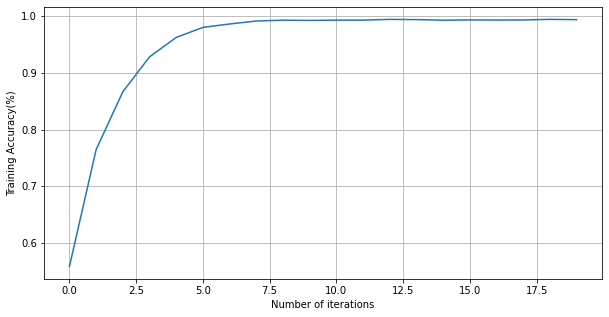

In [27]:
#Visualization of Results
plt.figure(figsize = (10,5))
plt.plot(history.history['accuracy'])
plt.xlabel('Number of iterations')
plt.ylabel('Training Accuracy(%)')
plt.grid()
plt.show()

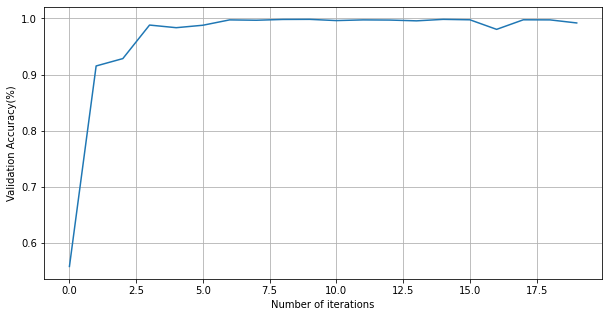

In [28]:
plt.figure(figsize = (10,5))
plt.plot(history.history['val_accuracy'])
plt.xlabel('Number of iterations')
plt.ylabel('Validation Accuracy(%)')
plt.grid()
plt.show()

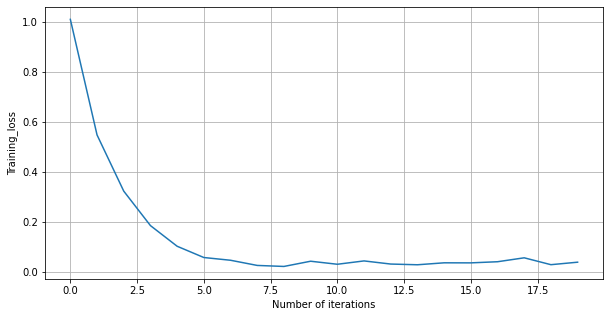

In [29]:
plt.figure(figsize = (10,5))
plt.plot(history.history['loss'])
plt.xlabel('Number of iterations')
plt.ylabel('Training_loss')
plt.grid()
plt.show()

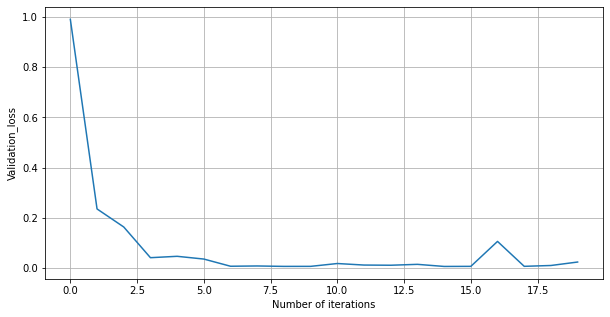

In [30]:
plt.figure(figsize = (10,5))
plt.plot(history.history['val_loss'])
plt.xlabel('Number of iterations')
plt.ylabel('Validation_loss')
plt.grid()
plt.show()